In [160]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [161]:
#x = [x**2 for x in range(1,100)]
#y = range(1, 100)

In [162]:
#plt.plot(x, y, 'ro')
#plt.show()

In [163]:
week1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt")
week2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt")
week3 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160423.txt")
week4 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160430.txt")
week5 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt")
week6 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt")
week7 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt")
week8 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt")
week9 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt")
#mtadf = pd.concat([week1, week2, week3, week4, week5, week6, week7, week8, week9], )

In [164]:
week1['week_flg'] = 1
week2['week_flg'] = 2
week3['week_flg'] = 3
week4['week_flg'] = 4
week5['week_flg'] = 5
week6['week_flg'] = 6
week7['week_flg'] = 7
week8['week_flg'] = 8

In [165]:
mtadf = pd.concat([week1, week2, week3, week4, week5, week6, week6, week7, week8], ignore_index=True)
len(mtadf)

1747742

In [166]:
#week1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt")
#week2 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160416.txt")

In [167]:
#mtadf = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160409.txt")
mtadf = mtadf.rename(columns=lambda x: x.strip())#stripping trailing/leading blanks

In [168]:
mtadf['date_time'] =pd.to_datetime(mtadf['DATE'] + ' ' + mtadf['TIME'],format="%m/%d/%Y %H:%M:%S")
mtadf['DATE'] = pd.to_datetime(mtadf['DATE'], format="%m/%d/%Y")

In [169]:
mtadf['statline'] = mtadf['STATION'] + ' ' +mtadf['LINENAME']
mtadf = mtadf.drop(axis=1, labels = ['DIVISION', 'DESC']) #drop columns to create df with only degrees
mtadf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline
0,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,00:00:00,5600838,1896290,1,2016-04-02 00:00:00,59 ST NQR456
1,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,04:00:00,5600863,1896293,1,2016-04-02 04:00:00,59 ST NQR456
2,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,08:00:00,5600877,1896313,1,2016-04-02 08:00:00,59 ST NQR456
3,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,12:00:00,5600922,1896375,1,2016-04-02 12:00:00,59 ST NQR456
4,A002,R051,02-00-00,59 ST,NQR456,2016-04-02,16:00:00,5601172,1896445,1,2016-04-02 16:00:00,59 ST NQR456


In [170]:
mtadf['dow'] = mtadf['DATE'].apply(datetime.weekday) #have to use apply to iterate over series

In [171]:
#mtadf.head(1000)

In [172]:
mtadf= mtadf.sort_values(by=['statline','C/A','UNIT','SCP','date_time'])
mtadf

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline,dow
29557,H007,R248,00-00-00,1 AV,L,2016-04-02,00:00:00,10910340,11896537,1,2016-04-02 00:00:00,1 AV L,5
29558,H007,R248,00-00-00,1 AV,L,2016-04-02,04:00:00,10910536,11896872,1,2016-04-02 04:00:00,1 AV L,5
29559,H007,R248,00-00-00,1 AV,L,2016-04-02,08:00:00,10910654,11897125,1,2016-04-02 08:00:00,1 AV L,5
29560,H007,R248,00-00-00,1 AV,L,2016-04-02,12:00:00,10911292,11897807,1,2016-04-02 12:00:00,1 AV L,5
29561,H007,R248,00-00-00,1 AV,L,2016-04-02,16:00:00,10912096,11898778,1,2016-04-02 16:00:00,1 AV L,5
29562,H007,R248,00-00-00,1 AV,L,2016-04-02,20:00:00,10912912,11899944,1,2016-04-02 20:00:00,1 AV L,5
29563,H007,R248,00-00-00,1 AV,L,2016-04-03,00:00:00,10913494,11900805,1,2016-04-03 00:00:00,1 AV L,6
29564,H007,R248,00-00-00,1 AV,L,2016-04-03,04:00:00,10913732,11901247,1,2016-04-03 04:00:00,1 AV L,6
29565,H007,R248,00-00-00,1 AV,L,2016-04-03,08:00:00,10913817,11901410,1,2016-04-03 08:00:00,1 AV L,6
29566,H007,R248,00-00-00,1 AV,L,2016-04-03,12:00:00,10914295,11902028,1,2016-04-03 12:00:00,1 AV L,6


In [173]:
mtadf['entrydiff'] = mtadf.groupby(by=[('statline')])['ENTRIES'].diff()
mtadf

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline,dow,entrydiff
29557,H007,R248,00-00-00,1 AV,L,2016-04-02,00:00:00,10910340,11896537,1,2016-04-02 00:00:00,1 AV L,5,NaN
29558,H007,R248,00-00-00,1 AV,L,2016-04-02,04:00:00,10910536,11896872,1,2016-04-02 04:00:00,1 AV L,5,196.0
29559,H007,R248,00-00-00,1 AV,L,2016-04-02,08:00:00,10910654,11897125,1,2016-04-02 08:00:00,1 AV L,5,118.0
29560,H007,R248,00-00-00,1 AV,L,2016-04-02,12:00:00,10911292,11897807,1,2016-04-02 12:00:00,1 AV L,5,638.0
29561,H007,R248,00-00-00,1 AV,L,2016-04-02,16:00:00,10912096,11898778,1,2016-04-02 16:00:00,1 AV L,5,804.0
29562,H007,R248,00-00-00,1 AV,L,2016-04-02,20:00:00,10912912,11899944,1,2016-04-02 20:00:00,1 AV L,5,816.0
29563,H007,R248,00-00-00,1 AV,L,2016-04-03,00:00:00,10913494,11900805,1,2016-04-03 00:00:00,1 AV L,6,582.0
29564,H007,R248,00-00-00,1 AV,L,2016-04-03,04:00:00,10913732,11901247,1,2016-04-03 04:00:00,1 AV L,6,238.0
29565,H007,R248,00-00-00,1 AV,L,2016-04-03,08:00:00,10913817,11901410,1,2016-04-03 08:00:00,1 AV L,6,85.0
29566,H007,R248,00-00-00,1 AV,L,2016-04-03,12:00:00,10914295,11902028,1,2016-04-03 12:00:00,1 AV L,6,478.0


In [174]:
mtadf2 =mtadf[mtadf['TIME'] != '00:00:00']

In [175]:
mtadf2

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,week_flg,date_time,statline,dow,entrydiff
29558,H007,R248,00-00-00,1 AV,L,2016-04-02,04:00:00,10910536,11896872,1,2016-04-02 04:00:00,1 AV L,5,196.0
29559,H007,R248,00-00-00,1 AV,L,2016-04-02,08:00:00,10910654,11897125,1,2016-04-02 08:00:00,1 AV L,5,118.0
29560,H007,R248,00-00-00,1 AV,L,2016-04-02,12:00:00,10911292,11897807,1,2016-04-02 12:00:00,1 AV L,5,638.0
29561,H007,R248,00-00-00,1 AV,L,2016-04-02,16:00:00,10912096,11898778,1,2016-04-02 16:00:00,1 AV L,5,804.0
29562,H007,R248,00-00-00,1 AV,L,2016-04-02,20:00:00,10912912,11899944,1,2016-04-02 20:00:00,1 AV L,5,816.0
29564,H007,R248,00-00-00,1 AV,L,2016-04-03,04:00:00,10913732,11901247,1,2016-04-03 04:00:00,1 AV L,6,238.0
29565,H007,R248,00-00-00,1 AV,L,2016-04-03,08:00:00,10913817,11901410,1,2016-04-03 08:00:00,1 AV L,6,85.0
29566,H007,R248,00-00-00,1 AV,L,2016-04-03,12:00:00,10914295,11902028,1,2016-04-03 12:00:00,1 AV L,6,478.0
29567,H007,R248,00-00-00,1 AV,L,2016-04-03,16:00:00,10915128,11902855,1,2016-04-03 16:00:00,1 AV L,6,833.0
29568,H007,R248,00-00-00,1 AV,L,2016-04-03,20:00:00,10915771,11903685,1,2016-04-03 20:00:00,1 AV L,6,643.0


In [176]:
mtadf2 = mtadf2[mtadf2['entrydiff'] > 0]

In [177]:
mtadf2['entrydiff'].describe()

count    1.199416e+06
mean     5.149224e+04
std      7.693440e+06
min      1.000000e+00
25%      2.900000e+01
50%      1.220000e+02
75%      3.170000e+02
max      2.126577e+09
Name: entrydiff, dtype: float64

In [184]:
mtadf2["entrydiff"].quantile(.999)

2059.0

In [151]:
#mtadf2["entrydiff"].value_counts()

In [181]:
mtadf2 = mtadf2[mtadf2['entrydiff'] < mtadf2["entrydiff"].quantile(.999)]

In [182]:
len(mtadf2)

1198216

In [183]:
len(mtadf)

1747742

In [185]:
mtadf2['entrydiff'].describe()

count    1.198216e+06
mean     2.261991e+02
std      2.861525e+02
min      1.000000e+00
25%      2.900000e+01
50%      1.220000e+02
75%      3.160000e+02
max      2.667000e+03
Name: entrydiff, dtype: float64

In [186]:
mtadf2['entrydiff'].argmin()

805421

In [62]:
mtadf.ix[134259]

C/A                         R170
UNIT                        R191
SCP                     00-03-00
STATION                   103 ST
LINENAME                       1
DATE         2016-04-07 00:00:00
TIME                    05:00:00
ENTRIES                  6893106
EXITS                    3799456
week_flg                       1
date_time    2016-04-07 05:00:00
statline                103 ST 1
dow                            3
entrydiff                      1
Name: 134259, dtype: object

In [187]:
mtadf2['entrydiff'].max()

2667.0

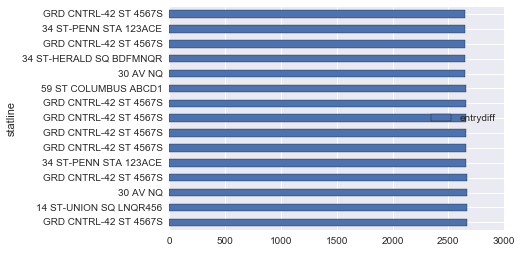

In [193]:
mtadf2.nlargest(15,columns='entrydiff').plot(x= 'statline', y= 'entrydiff',kind='barh')

In [69]:
mtadf2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE', 'TIME', 'ENTRIES',
       'EXITS', 'week_flg', 'date_time', 'statline', 'dow', 'entrydiff'],
      dtype='object')

In [190]:
mtadf3 = mtadf2.groupby(by=['statline'])['entrydiff'].sum()

In [100]:
mtadf3

statline
1 AV L                        1.745007e+06
103 ST 1                      1.405644e+04
103 ST 6                      9.157217e+04
103 ST BC                     2.380202e+02
103 ST-CORONA 7               2.320046e+04
104 ST A                      5.405674e+06
104 ST JZ                     8.162562e+06
110 ST 6                      2.507543e+04
111 ST 7                      2.098495e+03
111 ST A                      5.957520e+03
111 ST J                      9.069946e+03
116 ST 23                     1.115224e+04
116 ST 6                      2.466188e+04
116 ST BC                     2.366446e+06
116 ST-COLUMBIA 1             2.392605e+06
121 ST JZ                     2.114257e+03
125 ST 1                      1.586205e+06
125 ST 23                     3.930892e+06
125 ST 456                    2.133572e+06
125 ST ACBD                   3.389332e+05
135 ST 23                     1.886124e+04
135 ST BC                     9.647090e+04
137 ST CITY COL 1             7.765893e+05
13

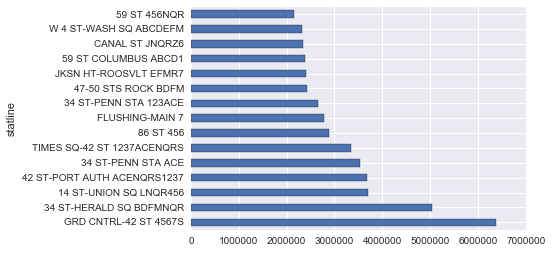

In [194]:
mtadf3.nlargest(15).plot(x= 'statline', y= 'entrydiff',kind='barh')

In [207]:
mtadf4 = mtadf2.groupby(by=['statline','dow'])['entrydiff'].sum().reset_index()

In [208]:
mtadf4

,statline,dow,entrydiff
0,1 AV L,0,156082.0
1,1 AV L,1,162485.0
2,1 AV L,2,168346.0
3,1 AV L,3,165766.0
4,1 AV L,4,168475.0
5,1 AV L,5,126447.0
6,1 AV L,6,100937.0
7,103 ST 1,0,104132.0
8,103 ST 1,1,110944.0
9,103 ST 1,2,102875.0


In [218]:
mtadf3.nlargest(15)

statline
GRD CNTRL-42 ST 4567S          6384809.0
34 ST-HERALD SQ BDFMNQR        5035010.0
14 ST-UNION SQ LNQR456         3711978.0
42 ST-PORT AUTH ACENQRS1237    3674337.0
34 ST-PENN STA ACE             3538270.0
TIMES SQ-42 ST 1237ACENQRS     3354597.0
86 ST 456                      2894762.0
FLUSHING-MAIN 7                2778742.0
34 ST-PENN STA 123ACE          2647402.0
47-50 STS ROCK BDFM            2422287.0
JKSN HT-ROOSVLT EFMR7          2403158.0
59 ST COLUMBUS ABCD1           2379059.0
CANAL ST JNQRZ6                2346221.0
W 4 ST-WASH SQ ABCDEFM         2311829.0
59 ST 456NQR                   2145341.0
Name: entrydiff, dtype: float64

<class 'list'>


TypeError: 'type' object is not subscriptable

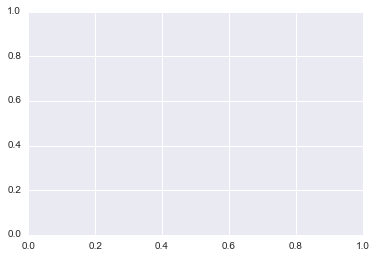

In [232]:
fig,ax = plt.subplots()

stations = ["GRD CNTRL-42 ST 4567S"] #mtadf3.nlargest(15)
print(type(stations))
for temp in stations:
    dat = mtadf4[mtadf4['statline'] == temp]
    #print((dat["dow"]))
    #print(mtadf4["entrydiff"])
    ax.plot(list[dat["dow"]], list[dat["entrydiff"]], label = "Station: {0}".format(temp))

plt.xlabel("Day Of Week")
plt.ylabel("Entry")
ax.legend()
plt.show()

In [ ]:
mtadf3[mtadf3['statline'] < mtadf2["entrydiff"].quantile(.999)]

In [78]:
mtadf3

,statline,dow,entrydiff
0,1 AV L,0,3.733417e+02
1,1 AV L,1,3.917583e+02
2,1 AV L,2,4.184250e+02
3,1 AV L,3,4.217833e+02
4,1 AV L,4,4.387750e+02
5,1 AV L,5,1.257367e+07
6,1 AV L,6,2.895000e+02
7,103 ST 1,0,3.671389e+02
8,103 ST 1,1,4.247879e+02
9,103 ST 1,2,3.757067e+02


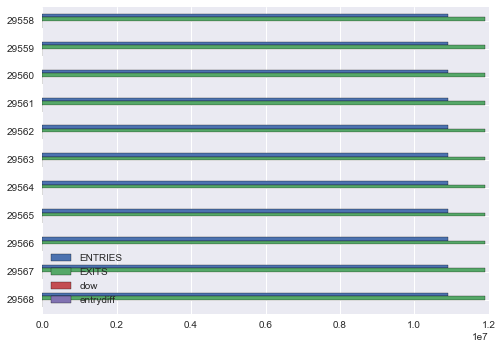

In [85]:
plt.figure(figsize=(15,7))
# plt.figure()
# StatFlowDF2.nlargest(15).plot(kind='bar')
#df = StatFlowDS.sort_values(ascending=False)
ax = mtadf2.iloc[:11].plot(kind="barh")
ax.invert_yaxis()

In [72]:
StatFlowDS = pd.Series(mtadf2[['statline','entrydiff']], name = 'DateValue')
# StatFlowDF2.to_csv('StatFlowDF2.csv')

ValueError: cannot copy sequence with size 2 to array axis with dimension 192421

In [ ]:
diff_df['sumentry'] = mtadf.groupby(by=['statline', 'date_time','dow','TIME']).sum().reset_index()

#df.groupby('userid').sum()
#diff_df.rename(columns = {'ENTRIES':'entrydiff', 'EXITS' :'exitdiff'}, inplace = True)
#print(len(diff_df))

In [ ]:
#pd.value_counts(mtadf['UNIT'].values)
len(diff_df)


In [ ]:
mtadf.dtypes

In [ ]:
#import dateutil.parser
#mtadf['date_time'] = mtadf['DATE'].apply(dateutil.parser.parse )
#mtadf

In [ ]:
#mtadf['DATE'] + ' ' + mtadf['TIME']

In [ ]:
mtadf.dtypes

In [ ]:
diff_df = mtadf.groupby(by=['statline', 'date_time','dow','TIME'])[('ENTRIES','EXITS')].sum().diff().reset_index()
diff_df.rename(columns = {'ENTRIES':'entrydiff', 'EXITS' :'exitdiff'}, inplace = True)
print(len(diff_df))
#mtadf.join(diff_df, on='statline',rsuffix='_r')
#mtadf['exitdiff'] = mtadf['EXITS'].diff()#.replace(np.nan, '')
diff_df

In [ ]:
mtadf.to_csv('/Users/pillbug/mtadf.csv')

In [ ]:
diff_df.sort_values(by=['entrydiff','statline','dow'], ascending=False)

In [ ]:
#df.sort_values(by=['userid','product'])
mtadf.sort_values(by=['entrydiff','STATION','dow'], ascending=False)

In [ ]:
pd.value_counts(mtadf['entrydiff'].values)

In [ ]:
pd.value_counts(mtadf['TIME'].values)

In [ ]:
faculty_dict = {k: v.iloc[:,1:4].values.tolist() for k,v in fac.groupby("lname")}
faculty_dict

In [ ]:
D.head()

In [ ]:
Sdict = defaultdict(list)

for key in Ddict:
# new dict with station identifier as key and all entry/exit counts as list of values
    tmpHdict = defaultdict(list)

    for tf in Ddict[key]:
        DateTime= tf[0]
        volumn = tf[1]

        tmpHdict[DateTime.date()].append(volumn)
#        break
#        print(tmpTdict)

        ## get difference between relevant highest(latest | 8/9pm) & lowest (earliest | 4/5am) index of count of the day
    tmpCdict = defaultdict(list)
    for date in tmpHdict.keys():
#        print (date)
        #count = max(tmpTdict[date]) - min(tmpTdict[date])
        if (len(tmpHdict[date])>=2):
            count = tmpHdict[date][len(tmpHdict[date])-1] - tmpHdict[date][1]
        else:
            count = [0]

        tmpCdict[date].append(count)
    Sdict[key]= tmpCdict

In [ ]:
print({k: Ddict[k] for k in list(Ddict.keys())[:1]})

In [ ]:
## Count Passenger Vol by Station-Unit_SCP

Sdict = defaultdict(list)

for key in Ddict:
# new dict with station identifier as key and all entry/exit counts as list of values
    tmpHdict = defaultdict(list)

    for tf in Ddict[key]:
        DateTime= tf[0]
        #wday = tf[1]
        volume = tf[1]

        tmpHdict[DateTime.date()].append(volume)
#break
#print(tmpTdict)

        ## get difference between relevant highest(latest | 8/9pm) & lowest (earliest | 4/5am) index of count of the day
    tmpCdict = defaultdict(list)
    for date in tmpHdict.keys():
#        print (date)
        #count = max(tmpTdict[date]) - min(tmpTdict[date])
        if (len(tmpHdict[date])>=2):
            count = tmpHdict[date][len(tmpHdict[date])-1] - tmpHdict[date][1]
        else:
            count = [0]

        # tmpCdict[date].append([date.weekday(),count])
        tmpCdict[date.weekday()].append(count)
    Sdict[key]= tmpCdict


#Sdict


## Cluster Count Passenger Vol by Station

DC = {(keys[0],keys[1],keys[3]): values for keys, values in Sdict.items() }


#pd.DataFrame(Sdict[list(Sdict.keys())[0]])
#pd.DataFrame(Sdict[list(Sdict.keys())[1]])
#pd.concat([])

In [ ]:
{k: DC[k] for k in list(DC.keys())[:10]}